In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define directories
train_dir = "C:\\Users\\User\\Desktop\\Plant_disease_7CROPS\\Pepper\\Train"
test_dir = "C:\\Users\\User\\Desktop\\Plant_disease_7CROPS\\Pepper\\Test"
validation_dir = "C:\\Users\\User\\Desktop\\Plant_disease_7CROPS\\Pepper\\Validation"


In [3]:
# Define the image size
img_size = (150, 150)
batch_size = 32

# Count the number of classes
num_classes = len(os.listdir(train_dir))

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 1980 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 975 images belonging to 2 classes.


In [4]:
# MobileNet Model
base_model = MobileNet(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mobilenet_history = mobilenet_model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

mobilenet_evaluation = mobilenet_model.evaluate(test_generator)
print("MobileNet Test Accuracy:", mobilenet_evaluation[1])

Epoch 1/25
62/62 [==============================] - 49s 613ms/step - loss: 0.5320 - accuracy: 0.8990 - val_loss: 0.0592 - val_accuracy: 0.9717
Epoch 2/25
62/62 [==============================] - 36s 575ms/step - loss: 0.0409 - accuracy: 0.9864 - val_loss: 0.0483 - val_accuracy: 0.9778
Epoch 3/25
62/62 [==============================] - 36s 572ms/step - loss: 0.0155 - accuracy: 0.9975 - val_loss: 0.0380 - val_accuracy: 0.9859
Epoch 4/25
62/62 [==============================] - 35s 565ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 0.0472 - val_accuracy: 0.9859
Epoch 5/25
62/62 [==============================] - 32s 514ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9838
Epoch 6/25
62/62 [==============================] - 36s 585ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9859
Epoch 7/25
62/62 [==============================] - 37s 593ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9859

In [5]:
# CNN Model from Scratch
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

cnn_evaluation = cnn_model.evaluate(test_generator)
print("CNN Test Accuracy:", cnn_evaluation[1])

Epoch 1/25
62/62 [==============================] - 79s 1s/step - loss: 0.5806 - accuracy: 0.7636 - val_loss: 0.2235 - val_accuracy: 0.9111
Epoch 2/25
62/62 [==============================] - 64s 1s/step - loss: 0.2323 - accuracy: 0.9278 - val_loss: 0.2755 - val_accuracy: 0.8828
Epoch 3/25
62/62 [==============================] - 71s 1s/step - loss: 0.1539 - accuracy: 0.9545 - val_loss: 0.1420 - val_accuracy: 0.9495
Epoch 4/25
62/62 [==============================] - 65s 1s/step - loss: 0.1225 - accuracy: 0.9616 - val_loss: 0.1066 - val_accuracy: 0.9616
Epoch 5/25
62/62 [==============================] - 71s 1s/step - loss: 0.0947 - accuracy: 0.9682 - val_loss: 0.1733 - val_accuracy: 0.9313
Epoch 6/25
62/62 [==============================] - 67s 1s/step - loss: 0.0556 - accuracy: 0.9788 - val_loss: 0.0833 - val_accuracy: 0.9677
Epoch 7/25
62/62 [==============================] - 72s 1s/step - loss: 0.0225 - accuracy: 0.9909 - val_loss: 0.0825 - val_accuracy: 0.9737
Epoch 8/25
62/62 [==

31/31 [==============================] - 5s 167ms/step


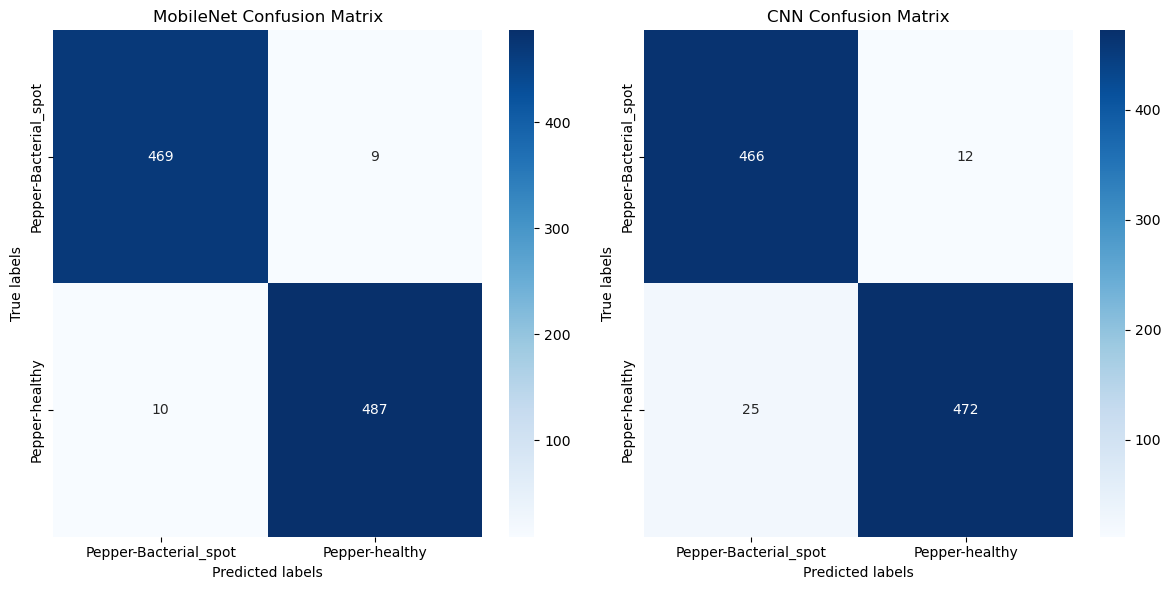

In [6]:
# Confusion matrix for MobileNet
mobilenet_predictions = mobilenet_model.predict(test_generator)
mobilenet_pred_labels = np.argmax(mobilenet_predictions, axis=1)
mobilenet_true_labels = test_generator.classes

mobilenet_conf_matrix = confusion_matrix(mobilenet_true_labels, mobilenet_pred_labels)

# Confusion matrix for CNN from scratch
cnn_predictions = cnn_model.predict(test_generator)
cnn_pred_labels = np.argmax(cnn_predictions, axis=1)

cnn_conf_matrix = confusion_matrix(mobilenet_true_labels, cnn_pred_labels)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(mobilenet_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('MobileNet Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.tight_layout()
plt.show()


In [7]:
# Print the summary of the CNN model
print(cnn_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0